

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این گام از پروژه به تحلیل بیشتر بر روی سفارش‌ها پرداخته و با پاسخ به چند پرسش و رسم چند نمودار، دید بهتری از اطلاعات مالی شرکت به دست خواهیم آورد.
</font>
</p>

In [1]:
# import libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv("preprocessed_sales.csv") # To-Do
df

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
400911,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
400912,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400913,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
400914,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [3]:
number_of_orders = df.InvoiceNumber.nunique() # To-Do

number_of_orders 

19213

In [4]:
# Window period
latest = df['InvoiceDate'].max()
earliest = df['InvoiceDate'].min()
window_period = (earliest, latest)

window_period

('2009-12-01 07:45:00', '2010-12-09 20:01:00')

C:\Users\hassan\AppData\Local\Temp\ipykernel_19500\2542922825.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels)


[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thur'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

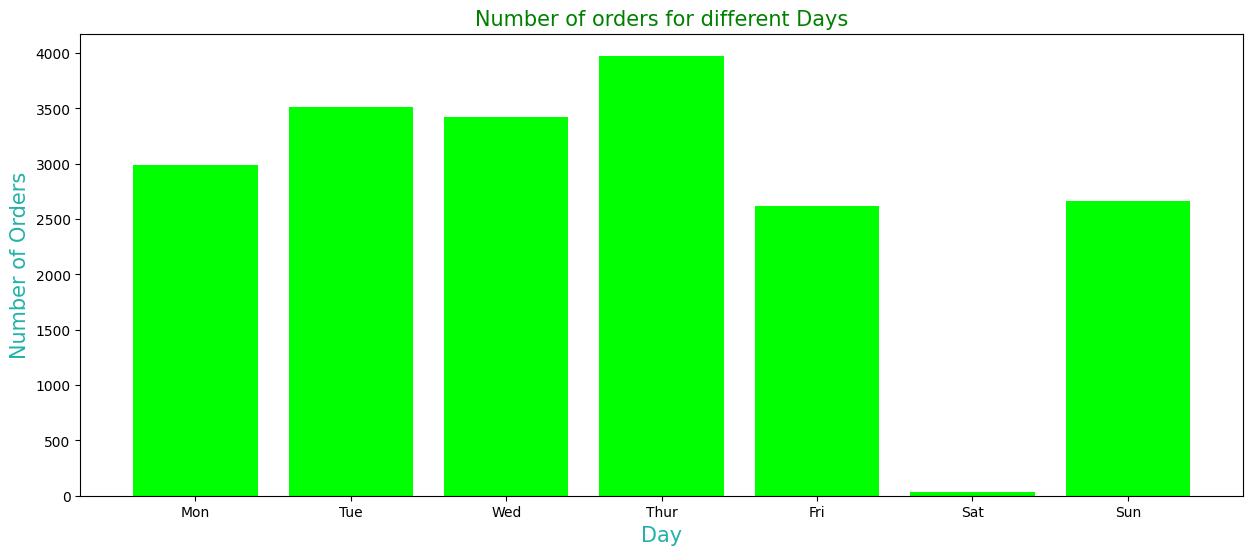

In [30]:
df2 = df.copy()
df2['InvoiceDate'] = pd.to_datetime(df2['InvoiceDate'])
# df2['InvoiceDate'] = df2['InvoiceDate'].apply(lambda x : datetime.strptime(x,"%Y-%m-%d %H:%M:%S") )

df2['days']= df2['InvoiceDate'].dt.day_name()

vals = df2.groupby('days')['InvoiceNumber'].nunique().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# vals = pd.DataFrame(df2.groupby('days').size()).T
# vals = vals[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

fig1,ax1 = plt.subplots(figsize = (15,6))

labels = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

ax1.bar(x=vals.index,height=vals.values,color = 'lime')
ax1.set_title("Number of orders for different Days",color = "green",size = 15)
ax1.set_ylabel("Number of Orders" , color = "lightseagreen",size = 15)
ax1.set_xlabel("Day" ,color = "lightseagreen",size = 15)
ax1.set_xticklabels(labels)


C:\Users\hassan\AppData\Local\Temp\ipykernel_19500\676827750.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, rotation=45, size=13)


[Text(0, 0, 'Dec_2009'),
 Text(1, 0, 'Jan_2010'),
 Text(2, 0, 'Feb_2010'),
 Text(3, 0, 'Mar_2010'),
 Text(4, 0, 'Apr_2010'),
 Text(5, 0, 'May_2010'),
 Text(6, 0, 'Jun_2010'),
 Text(7, 0, 'July_2010'),
 Text(8, 0, 'Aug_2010'),
 Text(9, 0, 'Sep_2010'),
 Text(10, 0, 'Oct_2010'),
 Text(11, 0, 'Nov_2010'),
 Text(12, 0, 'Dec_2010')]

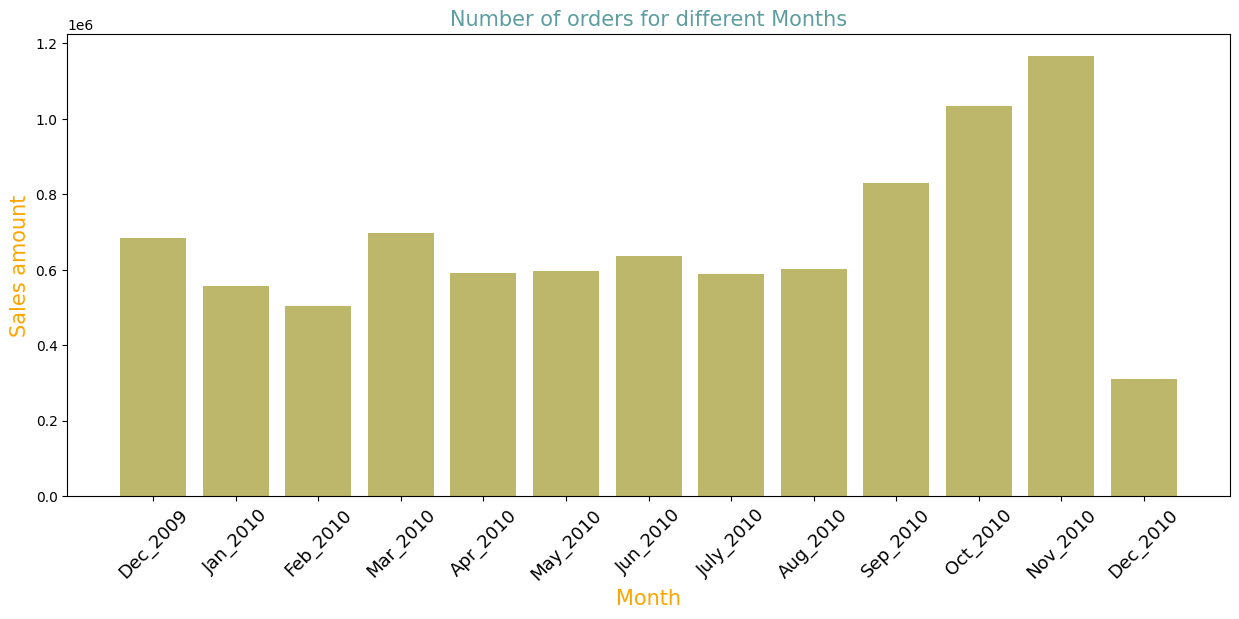

In [31]:

# Calculate total price
df2['TotalPrice'] = df2['UnitPrice'] * df2['Quantity']

# Extract month and year in the desired format
df2['month_year'] = df2['InvoiceDate'].dt.strftime("%Y-%m").astype("string")
mappped = { 
    "2009-12" : "Dec_2009",
    "2010-01" : "Jan_2010",
    "2010-02" : "Feb_2010",
    "2010-03" : "Mar_2010",
    "2010-04" : "Apr_2010",
    "2010-05" : "May_2010",
    "2010-06" : "Jun_2010",
    "2010-07" : "July_2010",
    "2010-08" : "Aug_2010",
    "2010-09" : "Sep_2010",
    "2010-10" : "Oct_2010",
    "2010-11" : "Nov_2010",
    "2010-12" : "Dec_2010",
}
labels = [
    "Dec_2009",
    "Jan_2010",
    "Feb_2010",
    "Mar_2010",
    "Apr_2010",
    "May_2010",
    "Jun_2010",
    "July_2010",
    "Aug_2010",
    "Sep_2010",
    "Oct_2010",
    "Nov_2010",
    "Dec_2010",
]
df2['month_year'] = df2['month_year'].replace(mappped)
a = df2.groupby(('month_year'),sort=False)['TotalPrice'].sum()

# Plot total sales per month
fig2, ax2 = plt.subplots(figsize=(15,6))
ax2.bar(x=a.index, height=a.values, color='darkkhaki')
ax2.set_title("Number of orders for different Months", color="cadetblue", size=15)
ax2.set_ylabel("Sales amount", color="orange", size=15)
ax2.set_xlabel("Month", color="orange", size=15)
ax2.set_xticklabels(labels, rotation=45, size=13)